# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.manifold import TSNE

In [27]:
data = pd.read_excel('alldata.xlsx')
features = data.drop(['navn', 'parti', 'storkreds', 'alder'], axis=1)

# Convert type of columns' name to string
features.columns = features.columns.astype(str)

Imagine you have a bunch of balloons of different colors spread out in a room. Each color represents a type of data, like age, height, or favorite ice cream flavor. Now, suppose you want to see which balloons tend to group together when you’re not looking (this grouping might show you patterns like younger kids prefer certain flavors more).

PCA is like using a special camera that can show you the best view of how these balloons are grouped. But for this camera to work best and give you a clear picture, you need to make sure all the balloons start off in the middle of the room rather than being scattered all around. This is like "centralizing" your data.

Centralizing means you move all your data points so that they have a "center" at zero. This doesn’t change the data itself, just how we look at it.

In [28]:
# By centering the data, each feature's mean is shifted to zero.
features = features - features.mean()

In [29]:
# Applying PCA using as many principal components as there are features in the dataset
pca_full = PCA()
data_transformed = pca_full.fit_transform(features)

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var_ratio:.2f}")

Explained Variance Ratio:
Principal Component 1: 0.46
Principal Component 2: 0.11
Principal Component 3: 0.05
Principal Component 4: 0.03
Principal Component 5: 0.03
Principal Component 6: 0.02
Principal Component 7: 0.02
Principal Component 8: 0.02
Principal Component 9: 0.01
Principal Component 10: 0.01
Principal Component 11: 0.01
Principal Component 12: 0.01
Principal Component 13: 0.01
Principal Component 14: 0.01
Principal Component 15: 0.01
Principal Component 16: 0.01
Principal Component 17: 0.01
Principal Component 18: 0.01
Principal Component 19: 0.01
Principal Component 20: 0.01
Principal Component 21: 0.01
Principal Component 22: 0.01
Principal Component 23: 0.01
Principal Component 24: 0.01
Principal Component 25: 0.01
Principal Component 26: 0.01
Principal Component 27: 0.01
Principal Component 28: 0.01
Principal Component 29: 0.01
Principal Component 30: 0.01
Principal Component 31: 0.01
Principal Component 32: 0.01
Principal Component 33: 0.01
Principal Component 34: 0.

The data shows the explained variance ratio for each principal component in a Principal Component Analysis (PCA). Principal Component 1 accounts for the largest amount of variance in the data at 46%, indicating it captures nearly half the information in the dataset, while subsequent components contribute progressively less, with many components contributing as little as 0 to 1% each

In [30]:
# Extracting loadings (eigenvectors) from the PCA object
loadings = pca_full.components_.T 

# Creating DataFrame with the PCA components and feature names
loadings_df = pd.DataFrame(pca_full.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(len(pca_full.components_))])

# Print the PCA components sorted by their contribution to each principal component
for i, pc in enumerate(loadings_df.index):
    print(f"\n{pc} Loadings - Top 5 Features:")
    loadings_sorted = loadings_df.loc[pc].abs().sort_values(ascending=False).head(5)
    print(loadings_sorted)


PC1 Loadings - Top 5 Features:
531    0.205416
550    0.205066
3b     0.204075
537    0.198883
543    0.193057
Name: PC1, dtype: float64

PC2 Loadings - Top 5 Features:
556    0.356049
10b    0.355004
551    0.298896
553    0.249885
555    0.243982
Name: PC2, dtype: float64

PC3 Loadings - Top 5 Features:
534    0.412871
547    0.348345
545    0.282984
535    0.252142
11b    0.243819
Name: PC3, dtype: float64

PC4 Loadings - Top 5 Features:
547    0.405458
546    0.298025
561    0.295494
553    0.249041
7a     0.248726
Name: PC4, dtype: float64

PC5 Loadings - Top 5 Features:
11b    0.362238
11a    0.289735
546    0.281083
7a     0.270862
538    0.252513
Name: PC5, dtype: float64

PC6 Loadings - Top 5 Features:
552    0.448793
553    0.346597
544    0.241632
10b    0.235354
556    0.227909
Name: PC6, dtype: float64

PC7 Loadings - Top 5 Features:
546    0.329696
533    0.290127
7a     0.275282
12b    0.251801
541    0.251593
Name: PC7, dtype: float64

PC8 Loadings - Top 5 Features:
55

Text(0.5, 0, 'Feature')

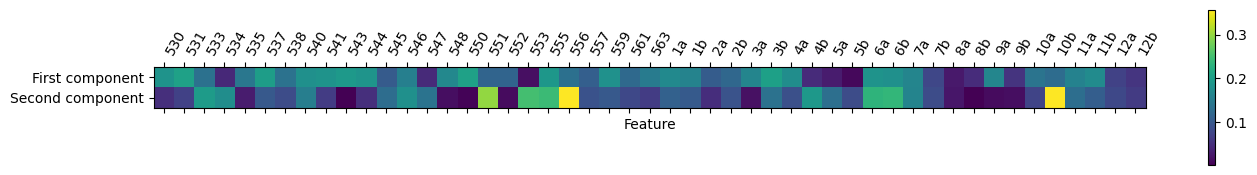

In [31]:
# Display feature weights (absolute values) in the first 2 principal components

plt.matshow(np.abs(pca_full.components_[:2]), cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features.columns)),
           features.columns, rotation=60, ha='left')
plt.xlabel("Feature")

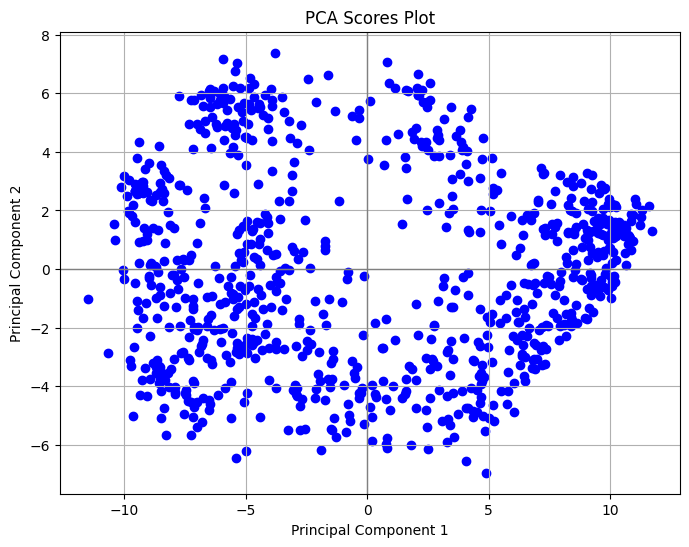

In [32]:
# Display the transformed data in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c='blue')
plt.title('PCA Scores Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

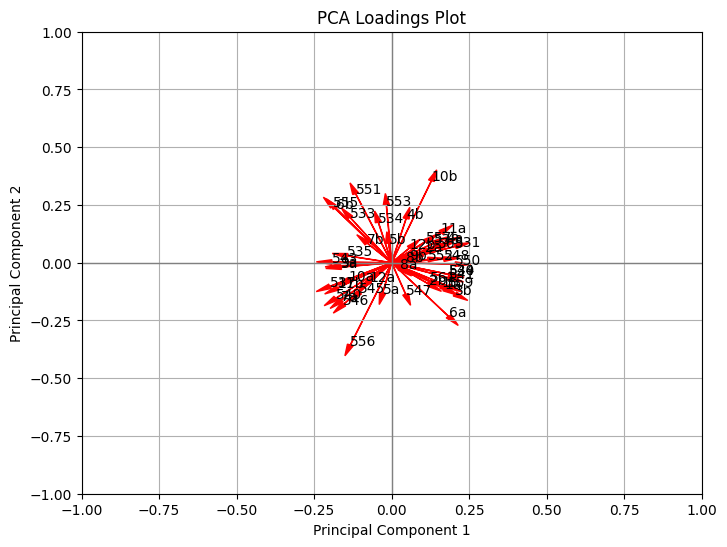

In [33]:
# Display the loadings (contribution of each question) in a biplot
plt.figure(figsize=(8, 6))
for i, feature in enumerate(features.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.02, head_length=0.05, color='red')
    plt.text(loadings[i, 0], loadings[i, 1], feature)

plt.title('PCA Loadings Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Interpretation**

*Distance from origin:* How much variance in the data that question explains. Further from the origin means more influence on the data's variance.

*Direction:* Indicates which questions are positively or negatively correlated with each component. Questions pointing in similar directions are related to each other.

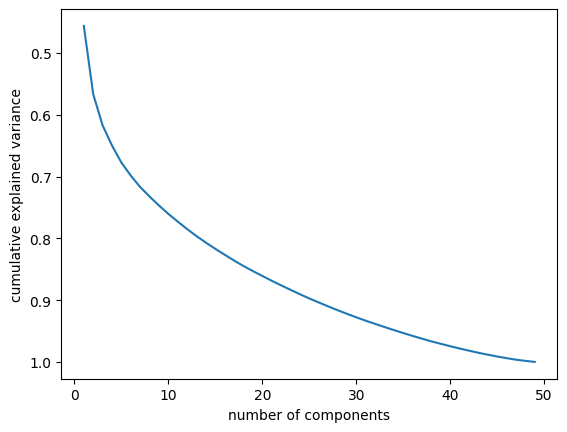

In [34]:
x = list(range(1, 1 + len(pca_full.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gca().invert_yaxis()
plt.show()

In [35]:
answers = data.drop(['navn', 'storkreds', 'alder'], axis=1)
answers = answers.groupby('parti').mean()
answers.columns = answers.columns.astype(str)

Average positions of parties concerning 5 most essentials question.

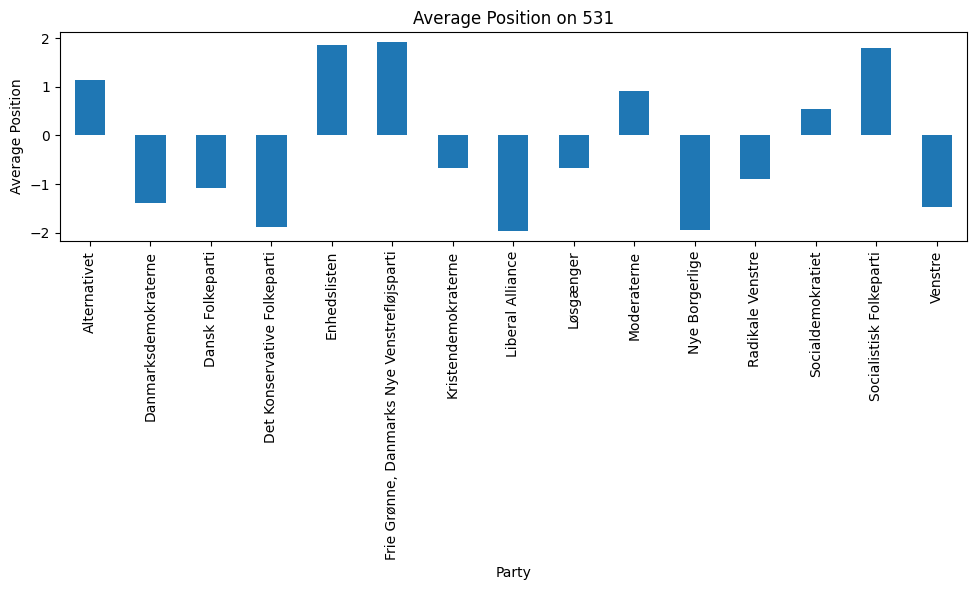

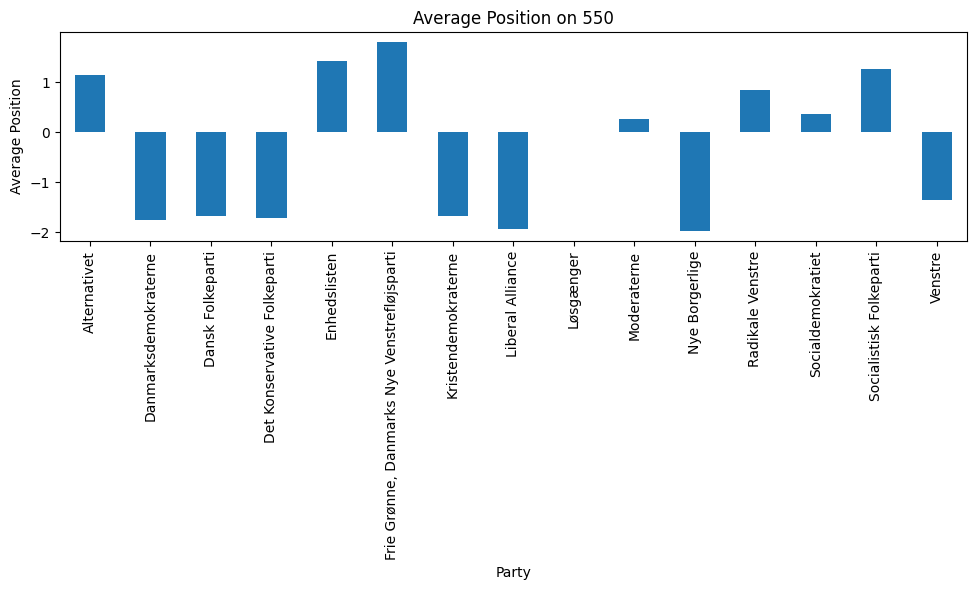

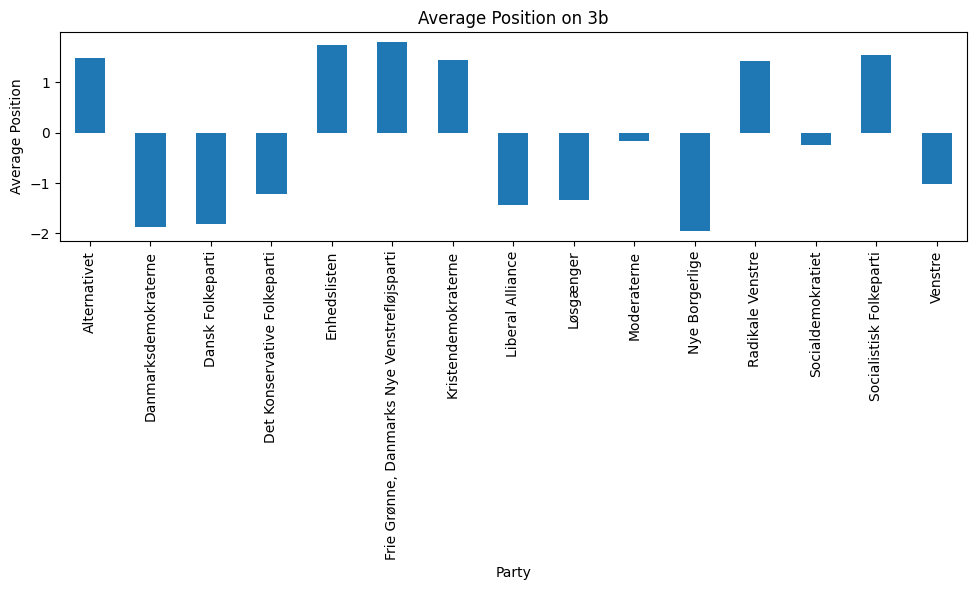

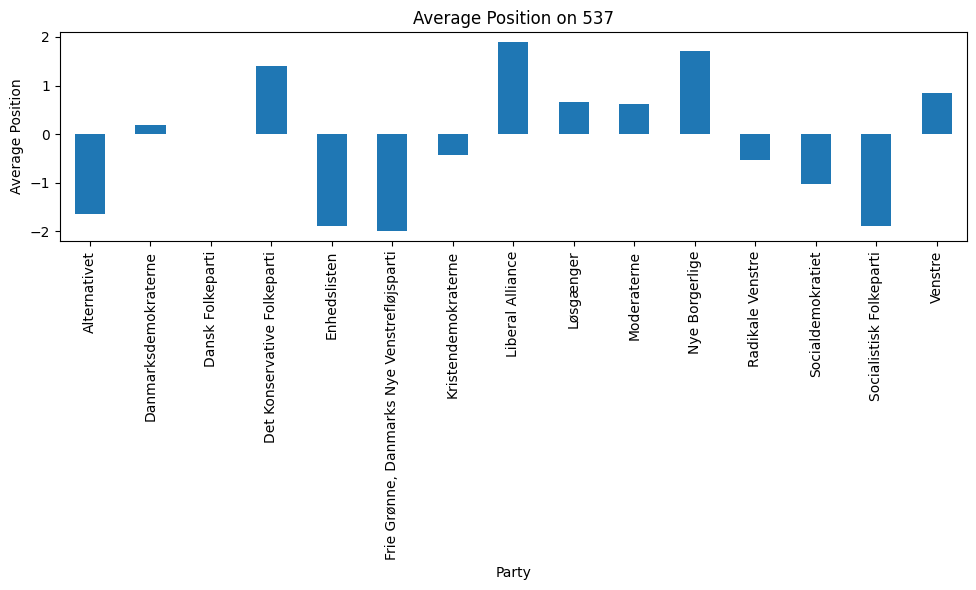

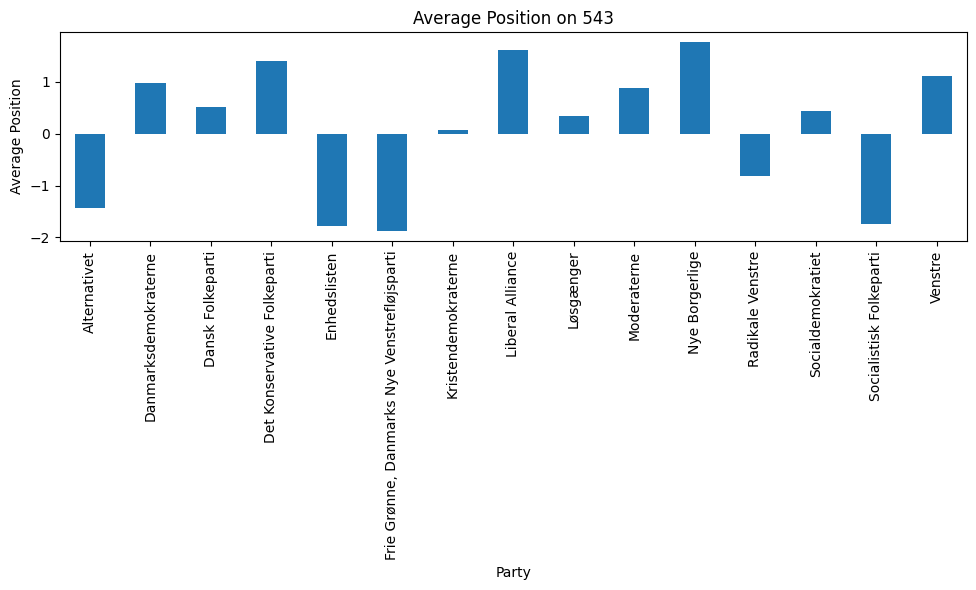

In [36]:
# Loop through each question to create a plot

# List of the selected columns
selected_columns = ['531', '550', '3b', '537', '543']

for question in selected_columns:
    answers[question].plot(kind='bar', figsize=(10, 6))
    plt.title(f'Average Position on {question}')
    plt.xlabel('Party')
    plt.ylabel('Average Position')
    plt.xticks(rotation=90)  # Rotate the party names for better readability
    plt.tight_layout()  # Adjust the layout
    plt.show()

In [37]:
political_parties_colors = {
    "Socialdemokratiet": (179, 39, 34, 255),
    "Venstre": (0, 102, 151, 255),
    "Moderaterne": (108, 57, 229, 255),
    "Socialistisk Folkeparti": (221, 8, 120, 255),
    "Danmarksdemokraterne": (138, 195, 255, 255),
    "Liberal Alliance": (33, 198, 207, 255),
    "Det Konservative Folkeparti": (158, 186, 39, 255),
    "Enhedslisten": (237, 128, 25, 255),
    "Radikale Venstre": (113, 50, 128, 255),
    "Nye Borgerlige": (5, 79, 92, 255),
    "Alternativet": (42, 143, 57, 255),
    "Dansk Folkeparti": (243, 205, 65, 255),
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": (0, 230, 106, 255),
    "Kristendemokraterne": (186, 186, 186, 255),
    "Løsgænger": (0, 0, 0, 255)
}

# Normalize the RGB values to [0, 1] as expected by matplotlib
party_colors = {party: (r/255, g/255, b/255, a/255) for party, (r, g, b, a) in political_parties_colors.items()}

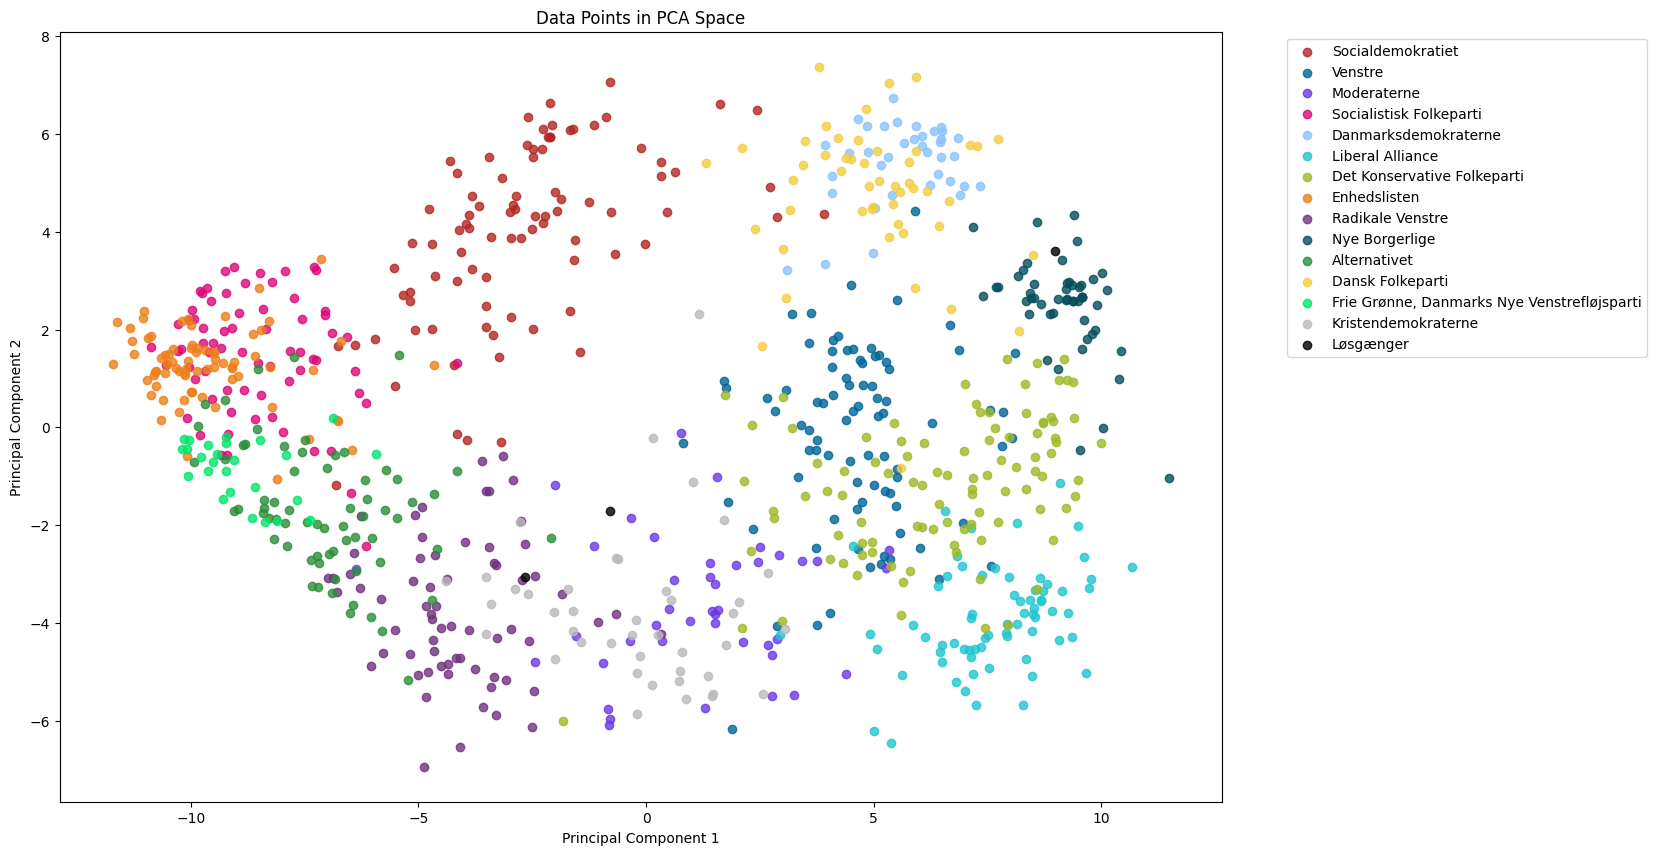

In [38]:
# Plot the colord transformed data
plt.figure(figsize=(15, 10))
for party in political_parties_colors.keys():
    party_indices = data[data['parti'] == party].index
    party_data = data_transformed[party_indices]
    # Multiply the x-coordinates by -1 to mirror the data across the y-axis
    mirrored_x_coordinates = -1 * party_data[:, 0]
    plt.scatter(mirrored_x_coordinates, party_data[:, 1], c=[party_colors[party]], label=party, alpha=0.8)

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points in PCA Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## _k_-means clustering

1. Use the elbow method to find a good value of _k_.

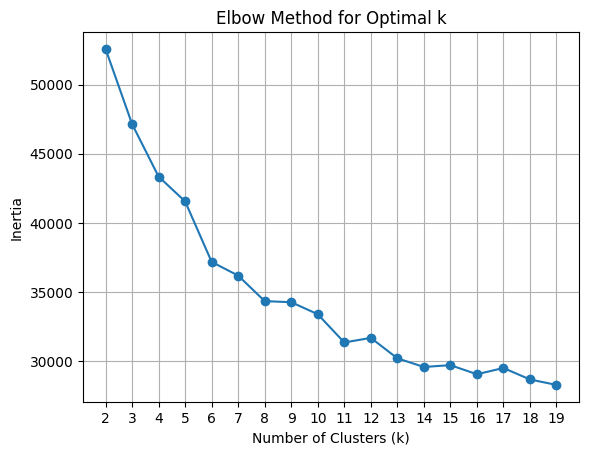

In [39]:
costs = []
ks = range(2,20)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed)
    costs.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.grid(True)
plt.show()

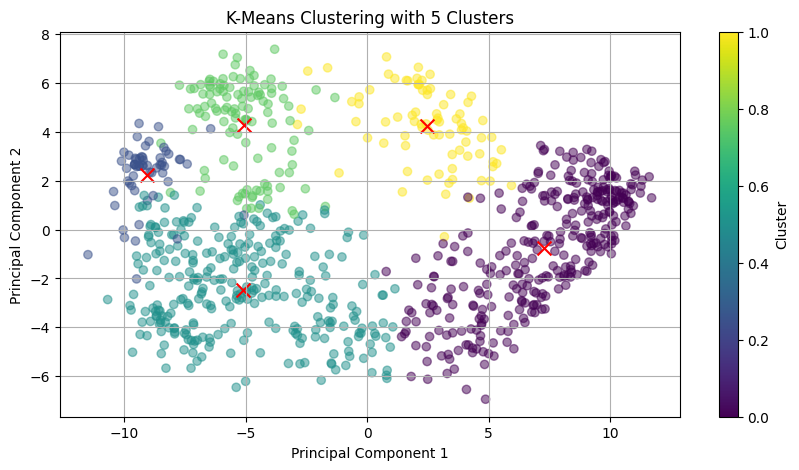

In [40]:
# Fit KMeans model to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit_predict(data_transformed)

# Predict cluster labels
labels = kmeans.predict(data_transformed)

# Visualize the recognized clusters
plt.figure(figsize=(10, 5))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100)  # Plot cluster centers

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 5 Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
    

## Agglomerative clustering

### Ward Linkage Method

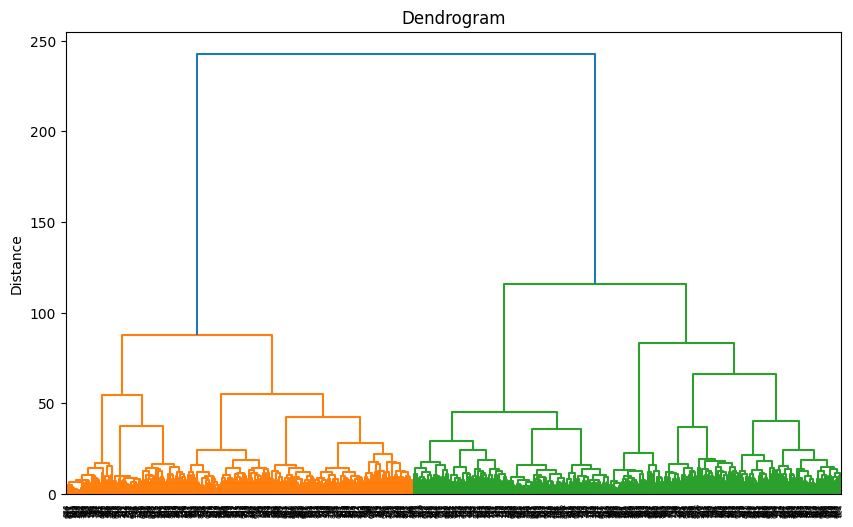

In [41]:
#compute distances using Ward's method
linkage_array = ward(data_transformed) 

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the dendrogram
dendrogram(linkage_array)

# Set labels and title
plt.ylabel('Distance')
plt.title('Dendrogram')

plt.show()

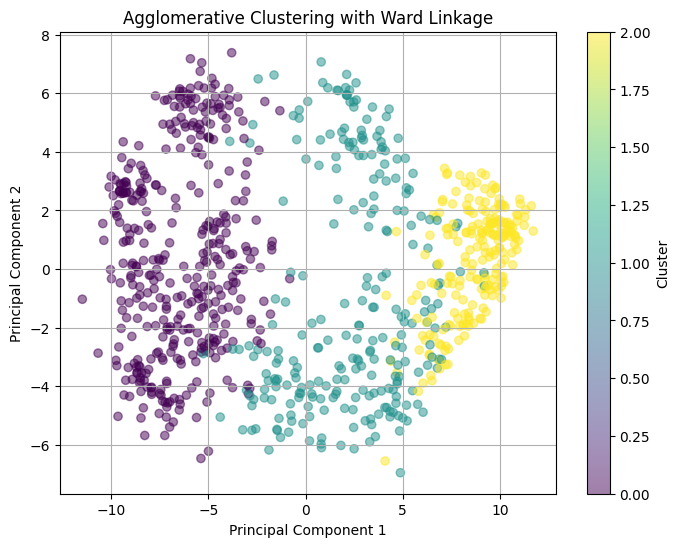

In [42]:
agg = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
labels = agg.fit_predict(data_transformed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with Ward Linkage')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Single linkage method

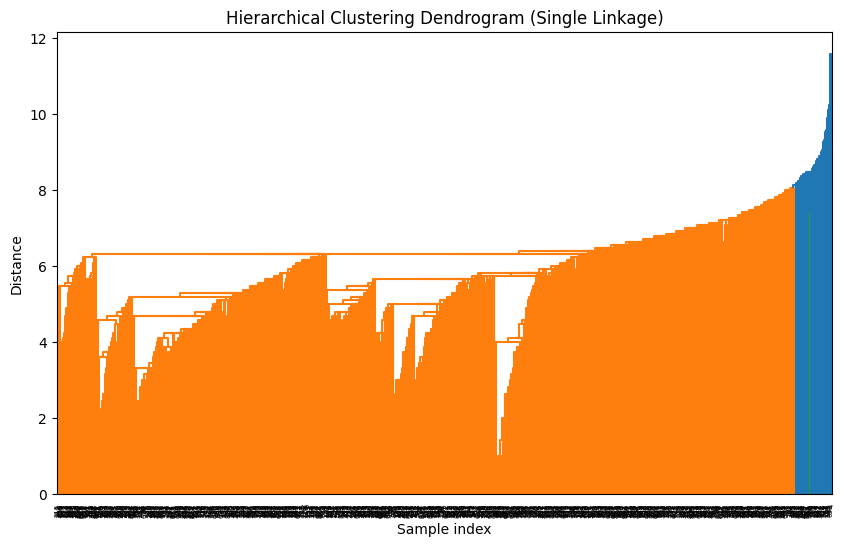

In [43]:
# Compute distances using single linkage method
linked_array_single = linkage(data_transformed, method='single')

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the dendrogram
dendrogram(linked_array_single,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

# Set labels and title
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.show()

 it looks like there is a significant merge that occurs at a height of around 6 on the y-axis (the distance measure). Above this point, there are very few merges until we reach the large jump in distance, indicating that you might consider choosing the number of clusters corresponding to the number of vertical lines that cross the threshold before this merge.

 If you draw a horizontal line at, for example, a distance of 6, you'll count how many vertical lines the horizontal line crosses. The number of crossed lines would be your desired number of clusters, 
𝑘
k. If the clusters below this threshold are too small or don't make sense for your application, you might consider a different approach or a different clustering method. It's also important to take into account the context and the domain knowledge when deciding on the number of clusters.

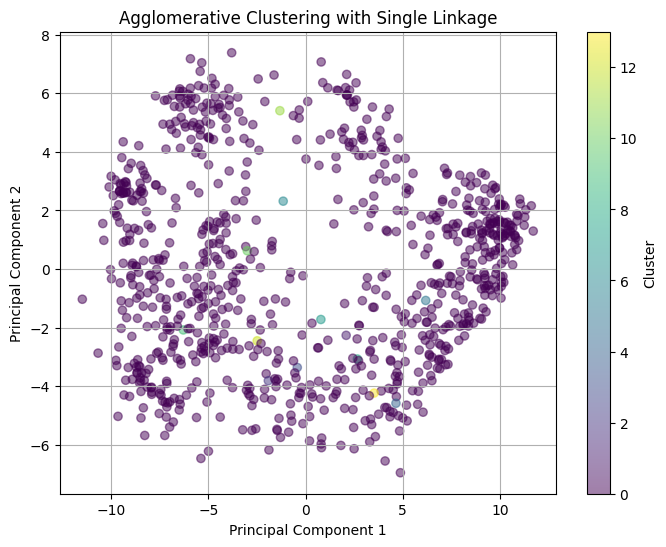

In [44]:
# From domain knowledge, we know that there are 14 political parties in the dataset
agg = AgglomerativeClustering(n_clusters=14, linkage = 'single')
labels = agg.fit_predict(data_transformed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with Single Linkage')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## DBSCAN

**eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

**min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [45]:
def calculate_k_distance(X,k): 
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X[i,:]-X[j,:]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

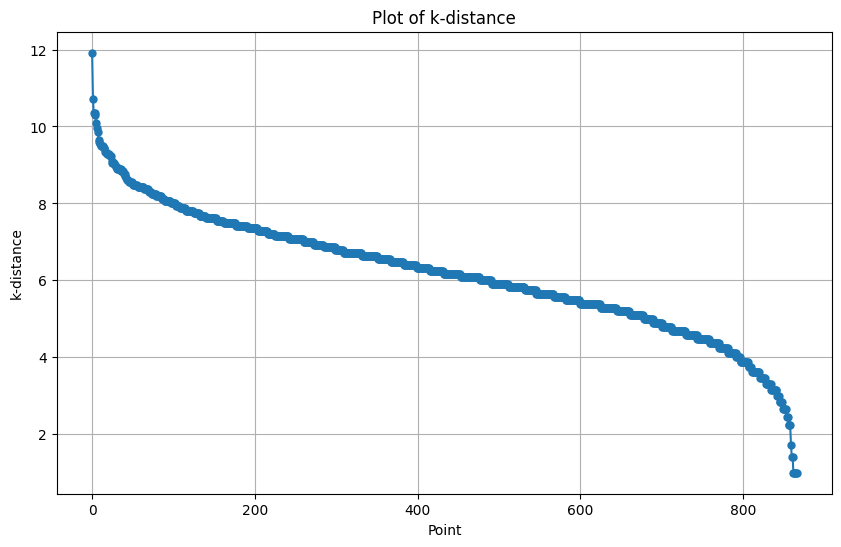

In [46]:
# chosen starting value based on dataset dimensionality and domain knowledge
k = 4
k_distances = calculate_k_distance(data_transformed, k)

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the k-distance values
plt.plot(range(len(data_transformed)), k_distances, '.-', markersize=10)
plt.xlabel('Point')
plt.ylabel('k-distance')
plt.title('Plot of k-distance')

plt.grid(True)
plt.show()

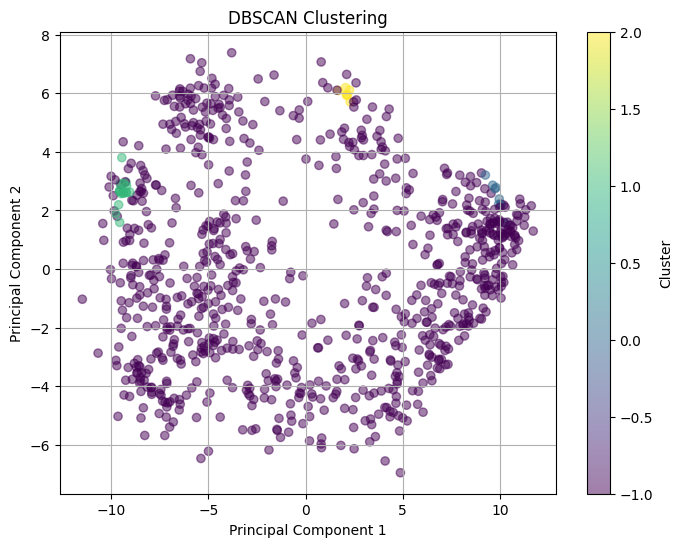

In [47]:
dbscan = DBSCAN(eps=3, min_samples=6)
labels = dbscan.fit_predict(data_transformed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Political Landscape of the Elected Candidates

In [48]:
elected_candidates = pd.read_excel('electeddata.xlsx')

elected_candidates = elected_candidates.drop(['storkreds', 'alder'], axis=1)

questions = elected_candidates.drop(['navn', 'parti'], axis=1)

# Center the data
questions = questions - questions.mean()

**PCA**: For reducing dimensionality for visualizations when linear relationships are sufficient or preprocessing data for linear models.

**t-SNE**: For creating informative visualizations of high-dimensional data and exploring the local structure of the data.

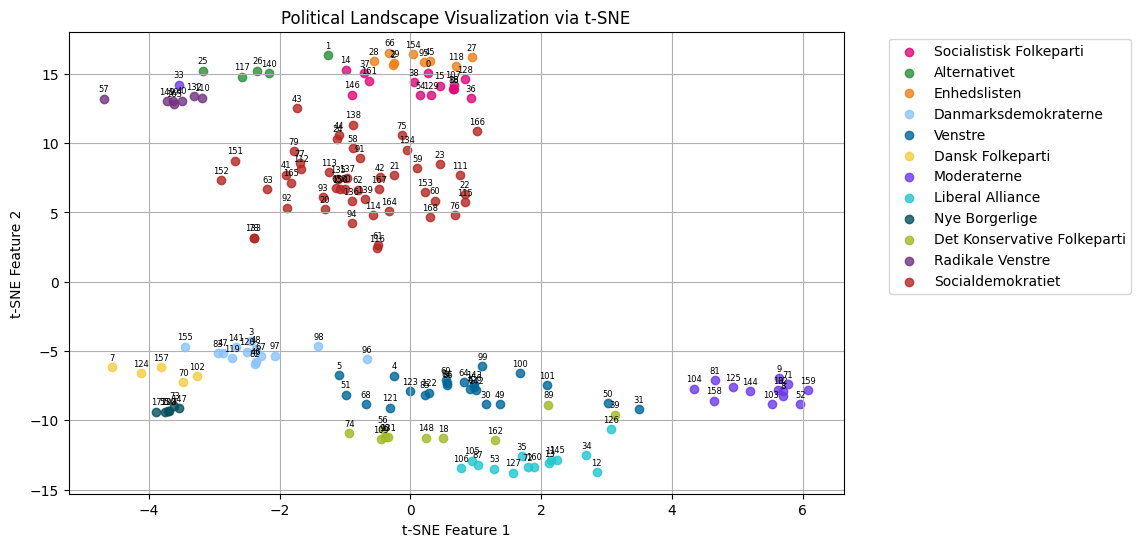

In [49]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(questions)

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 6))
for party in elected_candidates['parti'].unique():
    party_indices = elected_candidates[elected_candidates['parti'] == party].index
    # Multiply the x-coordinates by -1 to mirror the data
    mirrored_x_coordinates = -1 * tsne_results[party_indices, 0]
    for idx in party_indices:
        x = tsne_results[idx, 0]
        y = tsne_results[idx, 1]
        plt.scatter(x, y, label=party if idx == party_indices[0] else "", color=party_colors[party], alpha=0.8)
        plt.annotate(str(idx), (x, y), textcoords="offset points", xytext=(0,5), ha='center',  fontsize=6)

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('Political Landscape Visualization via t-SNE')

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


A common measure for spread or variation within a cluster is the variance or the standard deviation.

In [50]:
# Calculate the intra-party variation based on the t-SNE results
party_variations = {}
for party in elected_candidates['parti'].unique():
    party_indices = elected_candidates[elected_candidates['parti'] == party].index
    party_tsne_data = tsne_results[party_indices]
    # Compute the standard deviation for the t-SNE features for each party
    party_std = np.std(party_tsne_data, axis=0)
    # A simple way to combine the std deviations from both t-SNE dimensions might be to sum or average them
    party_variation = np.mean(party_std)
    party_variations[party] = party_variation

# Sort the parties by variation value in descending order
sorted_parties = sorted(party_variations.items(), key=lambda x: x[1], reverse=True)

# Print the ranking
print("Ranking of Parties by Intra-Party Variation:")
for rank, (party, variation) in enumerate(sorted_parties, start=1):
    print(f"{rank}. {party}: {variation:.2f}")

Ranking of Parties by Intra-Party Variation:
1. Moderaterne: 4.04
2. Socialdemokratiet: 1.61
3. Det Konservative Folkeparti: 1.03
4. Venstre: 0.97
5. Liberal Alliance: 0.72
6. Socialistisk Folkeparti: 0.64
7. Alternativet: 0.58
8. Danmarksdemokraterne: 0.55
9. Dansk Folkeparti: 0.44
10. Enhedslisten: 0.39
11. Radikale Venstre: 0.31
12. Nye Borgerlige: 0.14
